<a href="https://colab.research.google.com/github/EricSiq/India_Missing_Persons_Analysis_2017-2022/blob/main/ClusteringProject2_IndiaMissingPersonsData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Overview:
# This notebook demonstrates how to load multiple CSV datasets spanning the years, 2017 to 2022, merge them into a single dataframe, and perform several data processing and exploratory data analysis (EDA) steps. The sections below cover:







In [7]:
# Importing libraries
import pandas as pd         # For data manipulation and analysis
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns       # For enhanced visualization



# Data Loading

#   a) Data Loading & Analysis Description:
1.     - Reading the CSV files into pandas dataframes.
2.     - Examining basic structure & description of the data.

In [8]:
%matplotlib inline

# Setting a style for seaborn plots
sns.set(style="whitegrid")

# In this section, we load the five CSV files (one per year) into individual pandas dataframes.
# Define file paths for each year's data
file_paths = {
    2018: "DistrictwiseMissingPersons2018.csv",
    2019: "DistrictwiseMissingPersons2019.csv",
    2020: "DistrictwiseMissingPersons2020.csv",
    2021: "DistrictwiseMissingPersons2021.csv",
    2022: "DistrictwiseMissingPersons2022.csv"
}

# Initialize an empty list to hold dataframes from each CSV file.
dfs = []
# Loop through each file path and load the CSV with an alternate encoding to fix Unicode errors.
for year, path in file_paths.items():
    try:
        # Use 'ISO-8859-1' encoding to handle non-UTF8 encoded characters
        df = pd.read_csv(path, encoding='ISO-8859-1')
        # Add a 'Year' column to easily identify the dataset's time period
        df['Year'] = year
        dfs.append(df)
        print(f"Loaded data for {year} successfully with shape: {df.shape}")
    except Exception as e:
        print(f"Error loading data for {year}: {e}")

# Display a preview of the first dataset (2018) if loaded successfully
if dfs:
    print("\nPreview of the 2018 dataset:")
    print(dfs[0].head())
# ## b) PRE-PROCESSING
#
# Here, we combine the individual yearly datasets into one complete dataframe.
# We then perform several typical pre-processing steps:
#
#   - **Merging Data:** Concatenating dataframes while ensuring the consistency of columns.
#   - **Missing Values Check:** Identifying and handling missing data.
#   - **Data Type Conversions:** Ensuring the data types for each column are accurate
#     (for example, numerical columns are converted appropriately and textual columns are standardized).
#




Loaded data for 2018 successfully with shape: (892, 35)
Loaded data for 2019 successfully with shape: (917, 35)
Loaded data for 2020 successfully with shape: (932, 35)
Loaded data for 2021 successfully with shape: (941, 27)
Loaded data for 2022 successfully with shape: (969, 27)

Preview of the 2018 dataset:
   Year            State          District  Total_Male  Male_Below_5_years  \
0  2018   Andhra Pradesh         Anantapur         186                   0   
1  2018   Andhra Pradesh          Chittoor          93                   6   
2  2018   Andhra Pradesh          Cuddapah          66                   2   
3  2018   Andhra Pradesh     East Godavari         281                  13   
4  2018   Andhra Pradesh  Guntakal Railway           9                   0   

   Male_5 years_&_Above_Below_14_years  Male_14_years_&_Above_Below_18_years  \
0                                   15                                    31   
1                                   19                       

#   b) Pre-processing:
1.      - Merging the datasets.
2.     - Handling missing values and data type conversions.

In [9]:
# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Display combined dataframe shape and basic info
print("Combined dataset shape:", data.shape)
print("\nDataset Info:")
data.info()

# %% [code]
# Check for missing values in each column
missing_values = data.isna().sum()
print("\nMissing Values per column:\n", missing_values)

Combined dataset shape: (4651, 55)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 55 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         4651 non-null   int64  
 1   State                                        4651 non-null   object 
 2   District                                     4646 non-null   object 
 3   Total_Male                                   4646 non-null   float64
 4   Male_Below_5_years                           2736 non-null   float64
 5   Male_5 years_&_Above_Below_14_years          2736 non-null   float64
 6   Male_14_years_&_Above_Below_18_years         2736 non-null   float64
 7   Male_18_years_ &_Above_Below_30_years        2736 non-null   float64
 8   Male_30_years_&_ Above_Below_45_years        2736 non-null   float64
 9   Male_45_years_&_Above_Be


# **Handling Missing Values:**

  - Remove rows with missing key values.
  - Impute missing values with mean/median (for numerical data) or mode (for categorical data).

 Here, as an example, we'll fill numerical missing values with the mean and leave categorical missing values as is.

In [10]:

# Identify numerical columns (excluding the Year column)
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [col for col in num_cols if col != "Year"]

# Impute missing numerical values with the column mean
for col in num_cols:
    if data[col].isna().sum() > 0:
        mean_val = data[col].mean()
        data[col].fillna(mean_val, inplace=True)
        print(f"Filled missing values in '{col}' with mean: {mean_val}")

# For non-numerical columns, optionally you can fill missing values with "Unknown"
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()
for col in cat_cols:
    if data[col].isna().sum() > 0:
        data[col].fillna("Unknown", inplace=True)
        print(f"Filled missing values in '{col}' with 'Unknown'.")

# Verify that missing values have been handled
print("\nUpdated missing values per column:\n", data.isna().sum())

Filled missing values in 'Total_Male' with mean: 270.9052948773138
Filled missing values in 'Male_Below_5_years' with mean: 4.692982456140351
Filled missing values in 'Male_5 years_&_Above_Below_14_years' with mean: 14.991228070175438
Filled missing values in 'Male_14_years_&_Above_Below_18_years' with mean: 20.09502923976608
Filled missing values in 'Male_18_years_ &_Above_Below_30_years' with mean: 86.15972222222223
Filled missing values in 'Male_30_years_&_ Above_Below_45_years' with mean: 75.04751461988305
Filled missing values in 'Male_45_years_&_Above_Below_60_years' with mean: 39.843875685557585
Filled missing values in 'Male_60_years_&_Above' with mean: 19.522295321637426
Filled missing values in 'Total_Female' with mean: 539.4530779164872
Filled missing values in 'Female_Below_5_years' with mean: 4.759868421052632
Filled missing values in 'Female_5_years_&_Above_Below_14_years' with mean: 18.58406432748538
Filled missing values in 'Female_14_years_&_Above_Below_18_years' with 

<ipython-input-10-eb74b241788f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_val, inplace=True)
<ipython-input-10-eb74b241788f>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

#   c) Exploratory Data Analysis (EDA):
1.      - Statistical summary.
2.      - Distribution of key variables.
3.     - Trends across years and per district.
4.     - Visualizations with appropriate parameters.


Descriptive statistics for numerical columns:


,Total_Male,Male_Below_5_years,Male_5 years_&_Above_Below_14_years,Male_14_years_&_Above_Below_18_years,Male_18_years_ &_Above_Below_30_years,Male_30_years_&_ Above_Below_45_years,Male_45_years_&_Above_Below_60_years,Male_60_years_&_Above,Total_Female,Female_Below_5_years,...,Transgender_Below_12_years,Transgender_12_years_&_Above_Below_16_years,Transgender_16 years_&_Above_Below_18_years,Transgender_Children,Transgender_18 years_&_Above,Total_Below_12_years,Total_12 years_&_Above_Below_14_years,Total_14 years_&_Above_Below_18_years,Total_Children,Total_18 years_&_Above
count,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,...,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000
mean,270.905295,4.692982,14.991228,20.095029,86.159722,75.047515,39.843876,19.522295,539.453078,4.759868,...,0.014660,0.075393,0.113089,0.203141,0.221990,25.642408,57.086911,85.736126,168.465445,703.150785
std,1266.074849,17.350245,48.055214,64.499284,312.081592,296.400321,158.903761,77.930979,2372.799299,18.193176,...,0.147808,1.211162,2.034306,3.247933,1.960243,70.990493,170.649520,255.020039,472.497008,2081.281550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,1.000000,2.000000,11.000000,8.000000,4.000000,1.000000,10.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,15.000000,24.000000,57.000000,266.000000
50%,53.000000,4.692982,14.991228,20.095029,86.000000,71.000000,39.843876,19.522295,112.000000,4.759868,...,0.014660,0.075393,0.113089,0.203141,0.221990,25.642408,57.086911,85.736126,168.465445,703.150785
75%,167.000000,4.692982,14.991228,20.095029,86.159722,75.047515,39.843876,19.522295,371.500000,4.759868,...,0.014660,0.075393,0.113089,0.203141,0.221990,25.642408,57.086911,85.736126,168.465445,703.150785
max,30355.000000,441.000000,1086.000000,1405.000000,9430.000000,9742.000000,5211.000000,2505.000000,40725.000000,419.000000,...,5.000000,58.000000,98.000000,156.000000,75.000000,1806.000000,4900.000000,7171.000000,12455.000000,67687.000000


Column 'MissingPersonsCount' not found in the dataset.
Required columns for boxplot ('District' or 'MissingPersonsCount') not found.
Required columns for pivot table ('District' or 'MissingPersonsCount') not found.


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


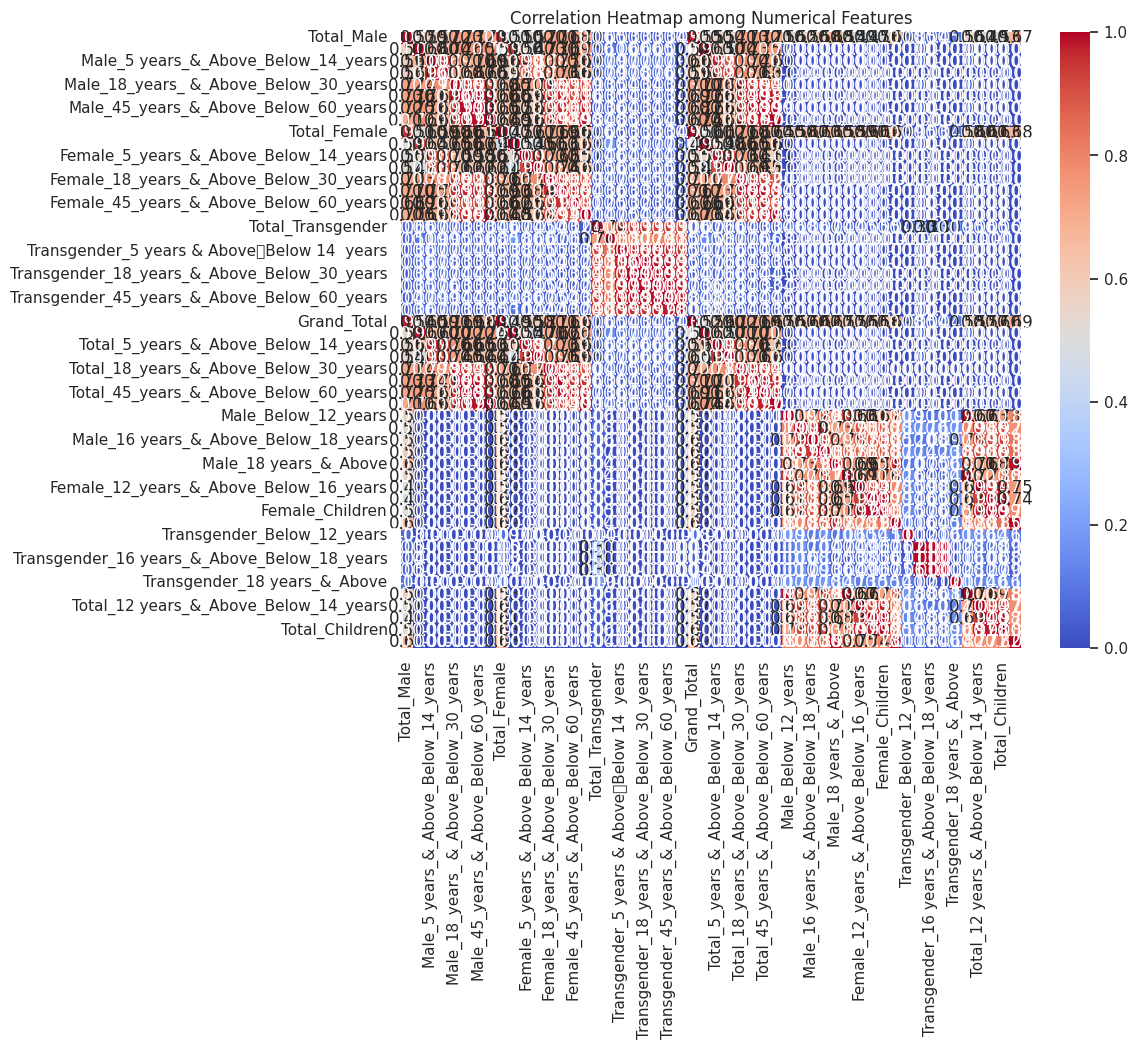

In [11]:

# In the EDA section, we will:
#   - Look at the summary statistics using descriptive statistics.
#   - Visualize distributions of the key numerical variables.
#   - Analyze trends over years and compare distributions across different districts.
#   - Use visualizations (e.g., histograms, boxplots, line charts, heatmaps) with robust parameters.

# Display descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
display(data[num_cols].describe())

# Visualizing distribution of a key numerical variable
# Here, we assume that there is a column like 'MissingPersonsCount' (adjust the column name as necessary)
# If the exact column name is different, replace 'MissingPersonsCount' with the appropriate one.

if "MissingPersonsCount" in data.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data["MissingPersonsCount"], kde=True, bins=30)
    plt.title("Distribution of Missing Persons Count")
    plt.xlabel("Missing Persons Count")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'MissingPersonsCount' not found in the dataset.")

# Example: Box plot to check the distribution per year or per district.
# We assume there is a district column named 'District'. Adjust as needed.

if "District" in data.columns and "MissingPersonsCount" in data.columns:
    plt.figure(figsize=(14,8))
    sns.boxplot(x="Year", y="MissingPersonsCount", data=data)
    plt.title("Boxplot of Missing Persons Count per Year")
    plt.xlabel("Year")
    plt.ylabel("Missing Persons Count")
    plt.show()
else:
    print("Required columns for boxplot ('District' or 'MissingPersonsCount') not found.")

# Analyzing trends per district over the years.
# Let's create a pivot table of average missing persons count by district and year.
if "District" in data.columns and "MissingPersonsCount" in data.columns:
    pivot_table = data.pivot_table(values="MissingPersonsCount",
                                   index="District",
                                   columns="Year",
                                   aggfunc="mean")
    print("Pivot Table of Average Missing Persons Count by District and Year:")
    display(pivot_table)

    # Plot a heatmap for visual representation
    plt.figure(figsize=(12,10))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title("Heatmap of Average Missing Persons Count by District and Year")
    plt.xlabel("Year")
    plt.ylabel("District")
    plt.show()
else:
    print("Required columns for pivot table ('District' or 'MissingPersonsCount') not found.")

# Correlation analysis: Visualize the correlation between numerical features.
plt.figure(figsize=(10,8))
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap among Numerical Features")
plt.show()


#  Additional EDA Parameters and Considerations:





# - **Parameter Choice in Visualizations:**  
#   We have chosen appropriate figure sizes, bin counts, and color maps to maximize the clarity of the plots.


# - **Handling Outliers:**  
#   The box plots can help identify potential outliers which might need further investigation.


# - **Time Trends:**  
#   Using pivot tables and heatmaps to study trends across different years and districts enables a comprehensive overview.


# - **Correlation Analysis:**  
#   Examining the correlation matrix helps us understand the relationships between various numerical variables.


# - **Adjustments:**  
#   Adjust column names or plot parameters as necessary once you confirm the actual structure of the dataset.
# This notebook template offers a comprehensive view of loading, pre-processing, and analyzing the data.
# Depending on the specifics of the dataset (column names, data quality, etc.), additional steps (e.g.,
# more advanced imputation techniques or outlier detection) may be required.